<a href="https://colab.research.google.com/github/abhiaro/ibm_course/blob/main/PROJECT_pred_temp_in_london.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

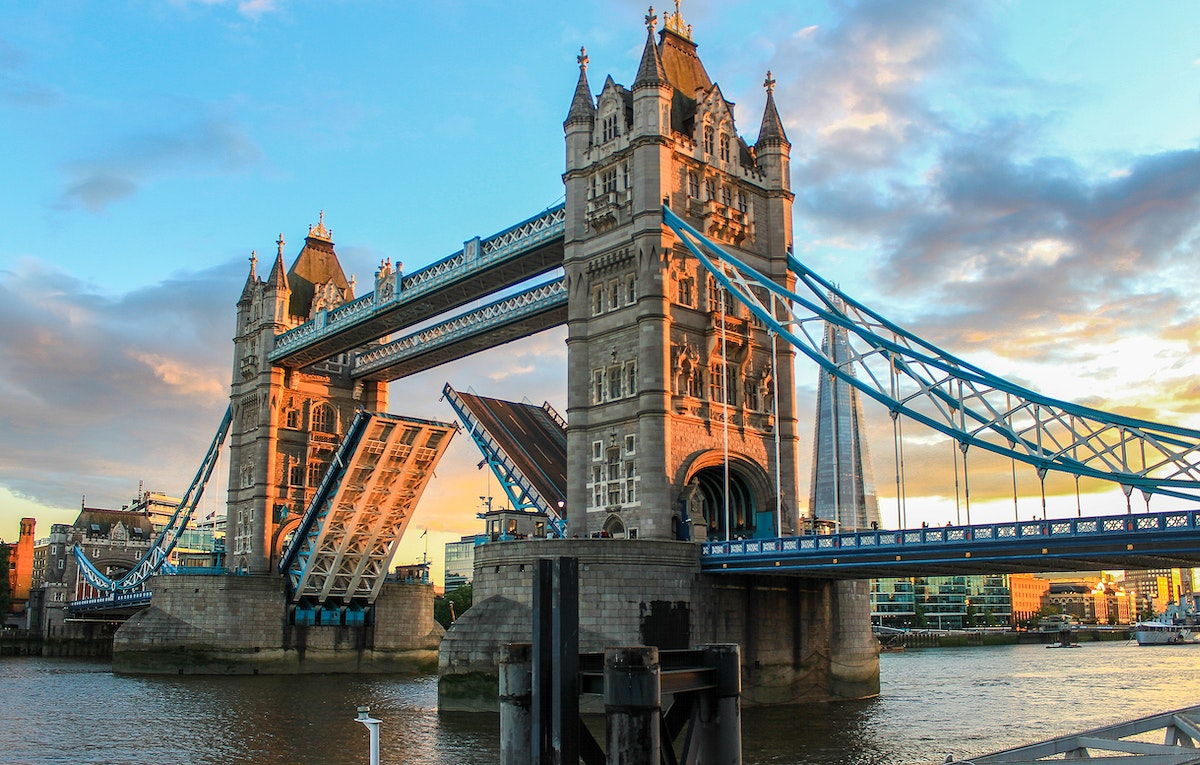

Test three different regression models on historical London weather data.

> - For this project, you will use the London weather dataset from 1979 to 2021. The goal is to automatically process and test different models using **sklearn** and **MLflow**. You will use weather data to predict the mean temperature on a given day.

> - The result of this project should be an MLflow experiment with three different regression models (linear regression, decision tree regressor, and random forest regressor) and their results.

> - Make sure to log the **RMSE scores** for each model as a metric called **rmse_{{model}}**, where {{model}} is replaced with lr, tr, and fr for **linear regression**, **decision tree regressor**, and **random forest regressor** respectively.

> - Perform **exploratory data analysis**, **preprocessing**, **training**, **prediction**, and **evaluation** of machine learning models to predict **"mean_temp"** from the **london_weather.csv**, **logging models**, **metrics**, and **parameters** to a **MLflow experiment**.

> - Read in **london_weather.csv** as a pandas DataFrame weather and perform exploratory data analysis to identify suitable features for predicting modeling.
Store selected features in feature_selection and the target variable as target_var.

> - Define a function called **preprocess_df()**, which takes three arguments: df- the DataFrame for preprocessing; feature_selection - the features to subset the DataFrame on; and target_var - the target variable for the predictive model. 

> - The function should split the data first into X and y, then into training and test sets, and should impute missing values and scale the data without allowing data leakage.

> - Define a function **predict_and_evaluate()**, which takes three arguments: model - a pre-trained ML model; x_test and y_test - test set for independent variables and labels respectively. 

> - The function should predict values from the test set for the particular model, and calculate and return the **root mean squared error (RSME)**.

> - Complete the for loop for varying depths, where you train the models, evaluate their performance using the **predict_and_evaluate()** function, and log their performance using the current depth.

https://towardsdatascience.com/experiment-tracking-with-mlflow-in-10-minutes-f7c2128b8f2c

https://www.geeksforgeeks.org/machine-learning-model-evaluation/

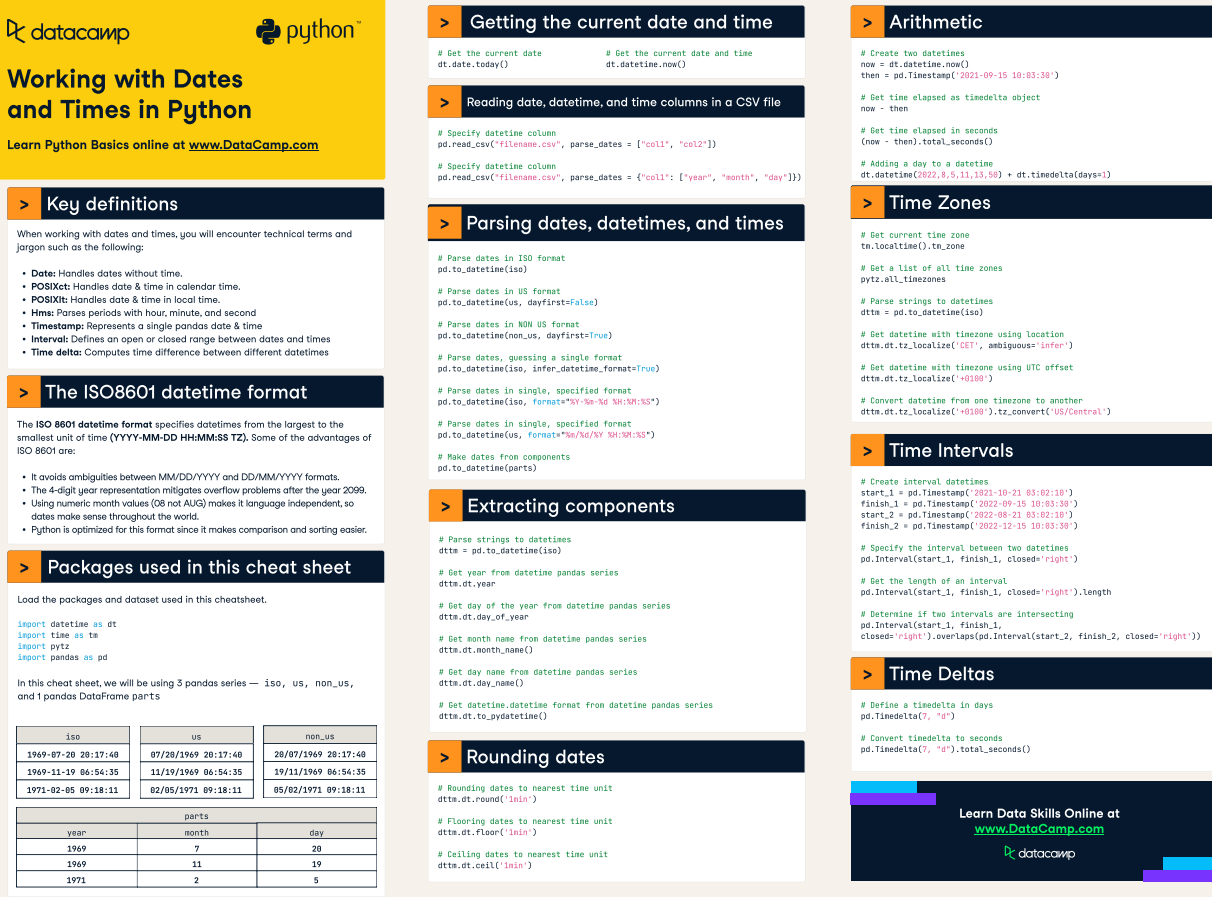

As the climate changes, predicting the weather becomes ever more important for businesses.<br> Since the weather depends on a lot of different factors, you will want to run a lot of experiments to determine what the best approach is to predict the weather.<br> In this project, you will run experiments for different regression models predicting the mean temperature, using a combination of sklearn and MLflow.

You will be working with data stored in london_weather.csv, which contains the following columns:

  1) **date** - recorded date of measurement - (int)<br>
  2)**cloud_cover** - cloud cover measurement in oktas - (float)<br>
  3)**sunshine** - sunshine measurement in hours (hrs) - (float)<br>
  4)**global_radiation** - irradiance measurement in Watt per square meter (W/m2) - (float)<br>
  5)**max_temp** - maximum temperature recorded in degrees Celsius (°C) - (float)<br>
  6)**mean_temp** - mean temperature in degrees Celsius (°C) - (float)<br>
 7)**min_temp** - minimum temperature recorded in degrees Celsius (°C) - (float)<br>
  8)**precipitation** - precipitation measurement in millimeters (mm) - (float)<br>
  9)**pressure** - pressure measurement in Pascals (Pa) - (float)<br>
  10)**snow_depth** - snow depth measurement in centimeters (cm) - (float)<br>

In [ ]:
!pip install mlflow

In [ ]:
# Load the modules 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#--------------------
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

**Imported Libraries:**

- **mlflow**: An open-source platform for managing the end-to-end machine learning lifecycle. It helps with experiment tracking, model versioning, and deployment of machine learning models.

- **sklearn**: A popular machine learning library in Python that provides a wide range of tools for data preprocessing, model selection, evaluation, and more.

**Imported Modules:**

- **train_test_split**: A module from `sklearn.model_selection` used to split a dataset into training and testing subsets.

- **mean_squared_error**: A module from `sklearn.metrics` used to calculate the mean squared error, a common evaluation metric for regression problems.

- **SimpleImputer**: A module from `sklearn.impute` used to handle missing values in a dataset by replacing them with some statistical measures.

- **StandardScaler**: A module from `sklearn.preprocessing` used to standardize features by removing the mean and scaling to unit variance.

- **LinearRegression**: A module from `sklearn.linear_model` representing a basic linear regression model.

- **DecisionTreeRegressor**: A module from `sklearn.tree` representing a decision tree-based regression model.

- **RandomForestRegressor**: A module from `sklearn.ensemble` representing an ensemble model based on multiple decision trees for regression tasks.


In [ ]:
# Import the data and perform exploratory data analysis
weather = pd.read_csv('london_weather.csv')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [ ]:
weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


<ipython-input-9-a3ad46cc6c9e>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="year", y="mean_temp", data=weather_per_month, ci=None)


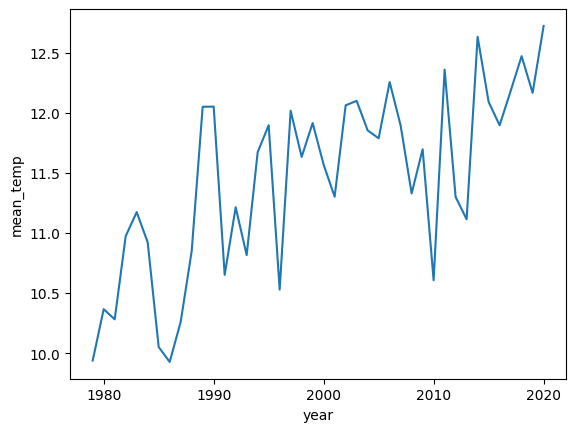

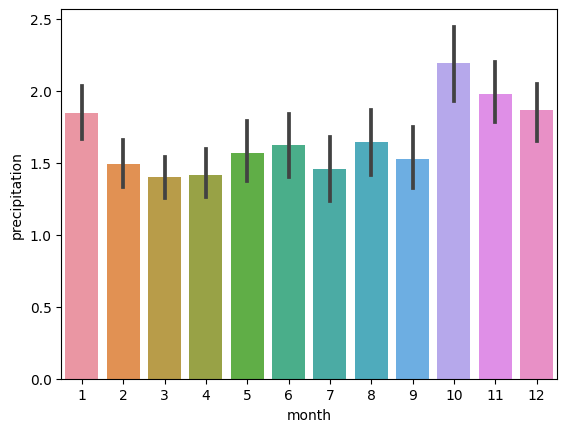

<ipython-input-9-a3ad46cc6c9e>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather.corr(), annot=True)


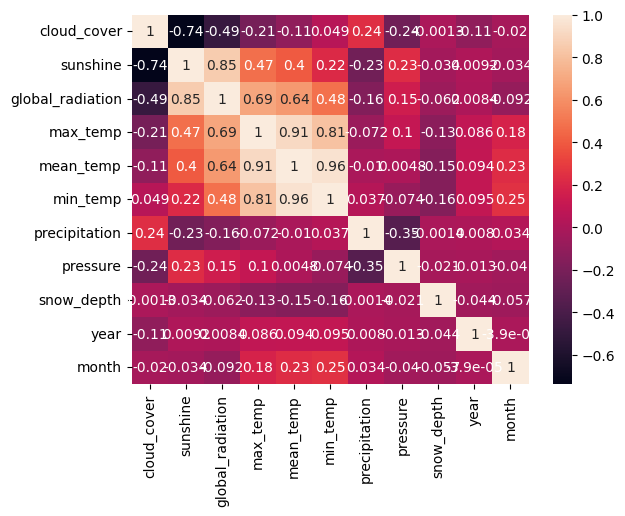

In [ ]:
weather['date'] = pd.to_datetime(weather['date'], format='%Y%m%d')
weather['year'] = weather['date'].dt.year
weather['month'] = weather['date'].dt.month
#To split the line, use a backslash \ at the end of the first line
weather_metrics = ['cloud_cover', 'sunshine', 'global_radiation', \
                   'max_temp', 'mean_temp', 'min_temp', \
                   'precipitation', 'pressure', 'snow_depth']
weather_per_month = weather.groupby(['year', 'month'], as_index = False)[weather_metrics].mean()
sns.lineplot(x="year", y="mean_temp", data=weather_per_month, ci=None)
plt.show()
sns.barplot(x='month', y='precipitation', data=weather)
plt.show()
sns.heatmap(weather.corr(), annot=True)
plt.show()

Here's a breakdown of the code step by step:

**weather['date'] = pd.to_datetime(weather['date'], format='%Y%m%d')**

This line converts the 'date' column in the 'weather' DataFrame to datetime format using the pd.to_datetime() function from the pandas library (pd). The format='%Y%m%d' argument specifies the format of the date string.

**weather['year'] = weather['date'].dt.year**

This line creates a new column called 'year' in the 'weather' DataFrame, which extracts the year component from the 'date' column using the .dt.year attribute of the datetime series.

**weather['month'] = weather['date'].dt.month**

This line creates a new column called 'month' in the 'weather' DataFrame, which extracts the month component from the 'date' column using the .dt.month attribute of the datetime series.

**weather_metrics = ['cloud_cover', 'sunshine', 'global_radiation', \ <br>'max_temp', 'mean_temp', 'min_temp', \ <br>'precipitation', 'pressure', 'snow_depth']**

This line defines a list called 'weather_metrics' that contains the names of specific weather metrics.

**weather_per_month = weather.groupby(['year', 'month'], as_index=False)[weather_metrics].mean()**

This line groups the 'weather' DataFrame by 'year' and 'month', and calculates the mean of the weather metrics specified in 'weather_metrics'. The resulting DataFrame, 'weather_per_month', will have the average values of the weather metrics per year and month.

**sns.lineplot(x="year", y="mean_temp", data=weather_per_month, ci=None)**


This line creates a line plot using the Seaborn library (sns). It plots the 'year' on the x-axis and the 'mean_temp' on the y-axis using the 'weather_per_month' DataFrame as the data source. The ci=None argument disables the confidence interval in the plot.

**plt.show()**

This line displays the line plot created by Seaborn using the plt.show() function from the matplotlib.pyplot library (plt).

**sns.barplot(x='month', y='precipitation', data=weather)**

This line creates a bar plot using Seaborn. It plots the 'month' on the x-axis and the 'precipitation' on the y-axis using the 'weather' DataFrame as the data source.
plt.show()

This line displays the bar plot created by Seaborn.

**sns.heatmap(weather.corr(), annot=True)**

This line creates a heatmap plot using Seaborn. It shows the correlation between different columns in the 'weather' DataFrame using the weather.corr() function. The annot=True argument displays the correlation values on the heatmap.

**plt.show()**

This line displays the heatmap plot created by Seaborn.

In [ ]:
# Choose features, define the target, and drop null values
feature_selection = ['month', 'cloud_cover', 'sunshine', 'precipitation',\
                     'pressure', 'global_radiation']
target_var = 'mean_temp'
weather = weather.dropna(subset=['mean_temp'])

These lines of code are responsible for:<br> <kbd> a) selecting specific features,<br> </kbd>
<kbd>b) defining the target variable, and</kbd><br> <kbd>c) dropping rows with null values for the 'mean_temp' column in the 'weather' DataFrame.</kbd> <br>
This preprocessing step is typically done to prepare the data for training a machine learning model.

1)**#Choose features, define the target, and drop null values**


**feature_selection = ['month', 'cloud_cover', 'sunshine', 'precipitation', \ <br> 'pressure', 'global_radiation']**

This line creates a list called feature_selection that contains the names of the selected features. These features are 'month', 'cloud_cover', 'sunshine', 'precipitation', 'pressure', and 'global_radiation'. These features will be used for the machine learning model.

2)**target_var = 'mean_temp'**

This line defines the target variable as 'mean_temp'. The target variable is the variable that you want to predict or model using the selected features.

3)**weather = weather.dropna(subset=['mean_temp'])**

This line drops the rows from the 'weather' DataFrame where the 'mean_temp' column has null values. The dropna() function is called on the DataFrame and the subset=['mean_temp'] argument specifies that only rows with null values in the 'mean_temp' column should be dropped. The resulting DataFrame is assigned back to the variable 'weather'.

In [ ]:
# Load data and perform exploratory analysis
def preprocess_df(df, feature_selection, target_var):
    """
    Split dataframe into X and y, and train and test consecutively. Then impute and scale both train and test features. Returns the train and test ets
    """
    # Subset the data
    X = df[feature_selection]    
    y = df[target_var]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
    
    # Impute missing values
    imputer = SimpleImputer(strategy="mean")
    
    # Fit on the training data
    X_train = imputer.fit_transform(X_train)

    # Transform on the test data
    X_test  = imputer.transform(X_test)
    
    # Scale the data
    scaler = StandardScaler()

    # Fit on the training data
    X_train = scaler.fit_transform(X_train)

    # Transform on the test data
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

Here's a breakdown of the code line by line:

=>Load data and perform exploratory analysis



<kbd>**def preprocess_df(df, feature_selection, target_var):**<br></kbd>

This line defines a function called preprocess_df that takes three parameters: df (the DataFrame to be preprocessed), feature_selection (a list of selected features), and target_var (the target variable to be predicted).
""" Split dataframe into X and y, and train and test consecutively. Then impute and scale both train and test features. Returns the train and test sets """

This is a multiline comment that provides a brief description of what the preprocess_df function does.<br>

<kbd>**X = df[feature_selection]**<br></kbd>

This line creates a DataFrame X by selecting the columns specified in feature_selection from the input DataFrame df.<br>

<kbd>**y = df[target_var]**<br></kbd>

This line creates a Series y by selecting the column specified in target_var from the input DataFrame df.<br>

<kbd>**X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)**<br></kbd>

This line splits the data into training and test sets using the train_test_split function from the sklearn.model_selection module. It assigns the split datasets to X_train, X_test, y_train, and y_test, respectively. The test_size=0.33 argument specifies that the test set should be 33% of the whole dataset, and the random_state=1 argument sets a specific random state for reproducibility.<br>

<kbd>**imputer = SimpleImputer(strategy="mean")**<br></kbd>

This line creates an instance of the SimpleImputer class from the sklearn.impute module. It uses the mean strategy to impute missing values.<br>

<kbd>**X_train = imputer.fit_transform(X_train)**<br></kbd>

This line imputes missing values in the X_train dataset using the fit_transform method of the SimpleImputer object. It replaces missing values with the mean value of each column from the training data.<br>

<kbd>**X_test = imputer.transform(X_test)**<br></kbd>

This line imputes missing values in the X_test dataset using the transform method of the SimpleImputer object. It replaces missing values with the mean value of each column, using the information learned from the training data.<br>

<kbd>**scaler = StandardScaler()**<br></kbd>

This line creates an instance of the StandardScaler class from the sklearn.preprocessing module. It will be used to scale the features.<br>

<kbd>**X_train = scaler.fit_transform(X_train)**<br></kbd>

This line scales the X_train dataset using the fit_transform method of the StandardScaler object. It standardizes the features by removing the mean and scaling to unit variance based on the training data.<br>

<kbd>**X_test = scaler.transform(X_test)**<br></kbd>

This line scales the X_test dataset using the transform method of the StandardScaler object. It applies the same scaling transformation learned from the training data to the test data.<br>

<kbd>**return X_train, X_test, y_train, y_test**<br></kbd>

This line returns the preprocessed training and test sets, X_train, X_test, y_train, and `y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess_df(weather, feature_selection, target_var)

In [ ]:
# Predict on the test set and evaluate performance
def predict_and_evaluate(model, x_test, y_test):
    """
    Predict values from test set, calculate and return the root mean squared error.
    """
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))    
    return rmse

Here's a detailed breakdown of the code with explanations for each line:

# Predict on the test set and evaluate performance

    def predict_and_evaluate(model, x_test, y_test):

> - This line starts the definition of the predict_and_evaluate function, which takes three parameters:
> > a). **model:** The machine learning model object used for prediction.<br>
> > b). **x_test:** The input data of the test set.<br>
> > c). **y_test:** The corresponding target values of the test set.
***
    """
    Predict values from test set, calculate and return the root mean squared error.
    """
This block is a docstring, which provides a brief explanation of the purpose of the function.
***
    y_pred = model.predict(x_test)
> - This line invokes the predict method of the model object to generate predictions (y_pred) for the test set (x_test).
***
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))    
> This line calculates the root mean squared error (RMSE) by utilizing the mean_squared_error function from the numpy library (np).<br>
> It takes two arguments:
>> a) **y_test:** The true target values of the test set.<br>
>> b) **y_pred:** The predicted values for the test set.
***
    return rmse
> - This line returns the calculated **RMSE (root mean square error)** value as the output of the function.<br>
> - The function as a whole encapsulates the process of predicting values on a test set using a given model and evaluating the model's performance by calculating the RMSE. 
> - The predicted values are compared to the true target values, and the RMSE is returned as the result.

In [ ]:
# Create an experiment
EXPERIMENT_NAME = "weather_prediction"
EXPERIMENT_ID = mlflow.create_experiment(EXPERIMENT_NAME)

### <kbd> The code snippet provided creates an experiment using the MLflow library for tracking machine learning experiments. Here is a breakdown of the code: </kbd>
> - By creating an experiment, you can organize and track different runs or iterations of your machine learning models. 

> - The experiment allows you to log metrics, parameters, and artifacts associated with each run, providing a comprehensive record of your machine learning experiments.

> - The variable **EXPERIMENT_NAME** is set to the string value **"weather_prediction"**. This is the name that will be given to the experiment.

> - The **mlflow.create_experiment()** function is called with **EXPERIMENT_NAME** as the argument. This function creates a new experiment in **MLflow** with the provided name.

> - The return value of **mlflow.create_experiment()** is assigned to the variable **EXPERIMENT_ID**. This variable will hold the unique identifier of the newly created experiment.

In [ ]:
# Predict, evaluate, and log the parameters and metrics of your models
for idx, depth in enumerate([1, 2, 5, 10, 20]):
    parameters = {
        'max_depth': depth
    }    
    run_name = f"run_{idx}"
        with mlflow.start_run(experiment_id=EXPERIMENT_ID, run_name=run_name):
          
        # Create models
        lin_reg = LinearRegression().fit(X_train, y_train)
        tree_reg = DecisionTreeRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
        forest_reg = RandomForestRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)

        # Log models
        mlflow.sklearn.log_model(lin_reg, "lin_reg")
        mlflow.sklearn.log_model(tree_reg, "tree_reg")
        mlflow.sklearn.log_model(forest_reg, "forest_reg")

        # Evaluate performance
        lin_reg_rmse = predict_and_evaluate(lin_reg, X_test, y_test)
        tree_reg_rmse = predict_and_evaluate(tree_reg, X_test, y_test)
        forest_reg_rmse = predict_and_evaluate(forest_reg, X_test, y_test)

        # Log performance
        mlflow.log_param("max_depth", depth)
        mlflow.log_metric("rmse_lr", lin_reg_rmse)
        mlflow.log_metric("rmse_tr", tree_reg_rmse)
        mlflow.log_metric("rmse_fr", forest_reg_rmse)

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


The given code snippet performs a machine learning experiment using different models with varying depths (max_depth) and logs the parameters and metrics using MLflow. Here is a breakdown of the code:


# Predict, evaluate, and log the parameters and metrics of your models
```
for idx, depth in enumerate([1, 2, 5, 10, 20]):
     parameters = {
        'max_depth': depth
    }    
    run_name = f"run_{idx}"
    with mlflow.start_run(experiment_id=EXPERIMENT_ID, run_name=run_name):
```
> - This code sets up a **loop** that iterates over a list of **depths [1, 2, 5, 10, 20]** for the models. 

> - **idx** is the index of the current iteration, and depth represents the value of the current depth being considered.<br>

> - Within each iteration, a dictionary parameters is created to hold the max_depth value for the current model.<br>

> - A run_name is generated using the current index idx, which is formatted as **"run_{idx}"**.<br>

> - This name will be used to identify and differentiate each run in the MLflow experiment.<br>

> - A new MLflow run is started using mlflow.start_run(), specifying the experiment_id and run_name as arguments.<br>

> - This begins a run within the experiment with the given ID, and the run will be identified by the provided name.

'''
        # Create models
        lin_reg = LinearRegression().fit(X_train, y_train)
        tree_reg = DecisionTreeRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
        forest_reg = RandomForestRegressor(random_state=42, max_depth=depth).fit(X_train, y_train)
'''
Inside the run, three models are created and trained: <br>
lin_reg (Linear Regression), '<br>
tree_reg (Decision Tree Regressor), and <br>
forest_reg (Random Forest Regressor). <br>
Each model is trained using the provided training data X_train and y_train, with the max_depth parameter set to the current depth value.

'''
        # Log models
        mlflow.sklearn.log_model(lin_reg, "lin_reg")
        mlflow.sklearn.log_model(tree_reg, "tree_reg")
        mlflow.sklearn.log_model(forest_reg, "forest_reg")
'''
> - The trained models are logged using mlflow.sklearn.log_model(). <br>
> - This function logs the models as artifacts within the MLflow run. <br>
> - Each model is given a unique name, such as "lin_reg", "tree_reg", and "forest_reg", which will be used to identify and retrieve the models later.

'''
        # Evaluate performance
        lin_reg_rmse = predict_and_evaluate(lin_reg, X_test, y_test)
        tree_reg_rmse = predict_and_evaluate(tree_reg, X_test, y_test)
        forest_reg_rmse = predict_and_evaluate(forest_reg, X_test, y_test)
'''
> - The performance of each model is evaluated by calling the predict_and_evaluate() function. <br>
> - This function calculates the root mean squared error (RMSE) between the predictions and the true target values using the test data X_test and y_test.<br>
> - The RMSE values are stored in variables lin_reg_rmse, tree_reg_rmse, and forest_reg_rmse, respectively.

'''
        # Log performance
        mlflow.log_param("max_depth", depth)
        mlflow.log_metric("rmse_lr", lin_reg_rmse)
        mlflow.log_metric("rmse_tr", tree_reg_rmse)
        mlflow.log_metric("rmse_fr", forest_reg_rmse)
'''
> - The performance metrics are logged using mlflow.log_metric(). 
> - The "max_depth" parameter is logged with the current depth value, and the RMSE values for each model are logged with their respective names ("rmse_lr" for Linear Regression, "rmse_tr" for Decision Tree Regressor, and "rmse_fr" for Random Forest Regressor).
       

In [ ]:
# Search the runs for the experiment's results
experiment_results = mlflow.search_runs(experiment_names=[EXPERIMENT_NAME])
experiment_results

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.rmse_lr,metrics.rmse_tr,metrics.rmse_fr,params.max_depth,tags.mlflow.user,tags.mlflow.runName,tags.mlflow.log-model.history,tags.mlflow.source.type,tags.mlflow.source.name
0,d08482e03b0c48a2bd5d4e6326bd5aeb,709869494770548026,FINISHED,file:///content/mlruns/709869494770548026/d084...,2023-06-08 16:05:00.639000+00:00,2023-06-08 16:05:12.066000+00:00,3.866773,3.807963,2.893355,20,root,run_4,"[{""run_id"": ""d08482e03b0c48a2bd5d4e6326bd5aeb""...",LOCAL,/usr/local/lib/python3.10/dist-packages/ipyker...
1,35bf8160968a4a2eacac4e9449112e1e,709869494770548026,FINISHED,file:///content/mlruns/709869494770548026/35bf...,2023-06-08 16:04:50.787000+00:00,2023-06-08 16:05:00.635000+00:00,3.866773,3.068346,2.814782,10,root,run_3,"[{""run_id"": ""35bf8160968a4a2eacac4e9449112e1e""...",LOCAL,/usr/local/lib/python3.10/dist-packages/ipyker...
2,66cdd75fc8964e33884b7387383f4f46,709869494770548026,FINISHED,file:///content/mlruns/709869494770548026/66cd...,2023-06-08 16:04:42.648000+00:00,2023-06-08 16:04:50.782000+00:00,3.866773,3.027733,2.967462,5,root,run_2,"[{""run_id"": ""66cdd75fc8964e33884b7387383f4f46""...",LOCAL,/usr/local/lib/python3.10/dist-packages/ipyker...
3,4b76f7bc2b2a4f44bbe432a12a814e75,709869494770548026,FINISHED,file:///content/mlruns/709869494770548026/4b76...,2023-06-08 16:04:31.326000+00:00,2023-06-08 16:04:42.637000+00:00,3.866773,3.917318,3.832143,2,root,run_1,"[{""run_id"": ""4b76f7bc2b2a4f44bbe432a12a814e75""...",LOCAL,/usr/local/lib/python3.10/dist-packages/ipyker...
4,7e198a3dfb9640febf155b276635bbf6,709869494770548026,FINISHED,file:///content/mlruns/709869494770548026/7e19...,2023-06-08 16:04:15.231000+00:00,2023-06-08 16:04:31.306000+00:00,3.866773,4.752035,4.694655,1,root,run_0,"[{""run_id"": ""7e198a3dfb9640febf155b276635bbf6""...",LOCAL,/usr/local/lib/python3.10/dist-packages/ipyker...


The provided code snippet searches for the runs within the specified MLflow experiment and retrieves the results. Here's an explanation of the code:

```
    experiment_results = mlflow.search_runs(experiment_names=[EXPERIMENT_NAME])
```
> - The **mlflow.search_runs()** function is called to search for runs within the MLflow experiment. 

> - It takes the **experiment_names** parameter, which is set to [EXPERIMENT_NAME] - a list containing the name of the desired experiment to search for.

> - The search results are stored in the **experiment_results** variable. This variable will hold the retrieved information about the runs, including parameters, metrics, and other metadata.

> - By executing this code, you can obtain the results of the runs within the specified MLflow experiment. 

> - The experiment_results variable will contain the retrieved data, allowing you to further analyze and visualize the experiment's outcomes.

<kbd>**Scaling**</kbd><br>

-Scaling refers to the process of transforming data to a specific range. <br>It is used to bring all features or variables to a similar scale, allowing them to be compared on a common basis.<br>
-Scaling is particularly important when working with machine learning algorithms that are sensitive to the scale of the input features, such as distance-based algorithms (e.g., k-nearest neighbors) or optimization algorithms (e.g., gradient descent).<br>
-Common scaling techniques include Min-Max scaling, where the data is scaled to a specific range (e.g., between 0 and 1), and Z-score scaling, where the data is scaled to have a mean of 0 and a standard deviation of 1.<br>

<kbd>**Standardization**</kbd><br>

-Standardization is a specific type of scaling that transforms the data to have zero mean and unit variance.<br> It is also known as Z-score scaling or Z-score normalization.<br>
-The standardization process calculates the mean and standard deviation of the data and then transforms each data point by subtracting the mean and dividing by the standard deviation.<br>
-Standardization is useful when the distribution of the data is not known or not necessarily Gaussian (normal).<br> It allows algorithms to work well on data that does not follow a specific distribution.<br>

<kbd>**Normalization**</kbd><br>

-Normalization is another type of scaling that adjusts the values of features to a common scale, typically between 0 and 1.<br>
-Normalization is often used when the scale of the input features is arbitrary or not meaningful, and you want to rescale them to a standard range.<br>
-Common normalization techniques include Min-Max normalization, where the data is linearly transformed to fit within a specified range (e.g., 0 to 1), and L1 or L2 normalization, which scales each data point by its magnitude (L1 norm or L2 norm).

-In summary, scaling, standardization, and normalization are preprocessing techniques used to adjust the scale or distribution of data.<br> -Scaling ensures that features are on a similar scale, standardization transforms data to have zero mean and unit variance, and normalization rescales data to a specific range or magnitude.<br> -These techniques are applied based on the characteristics of the data and the requirements of the machine learning algorithms being used.


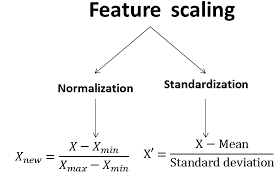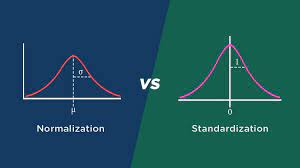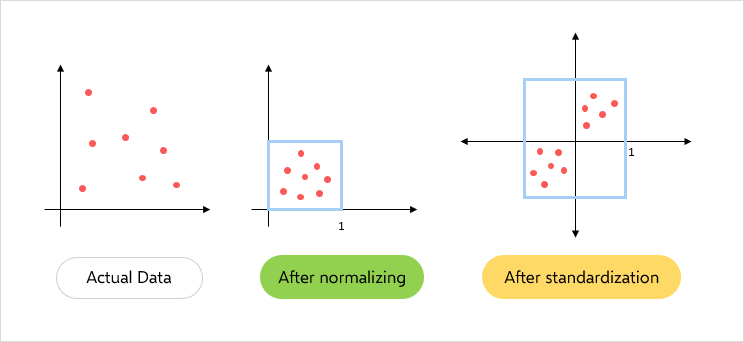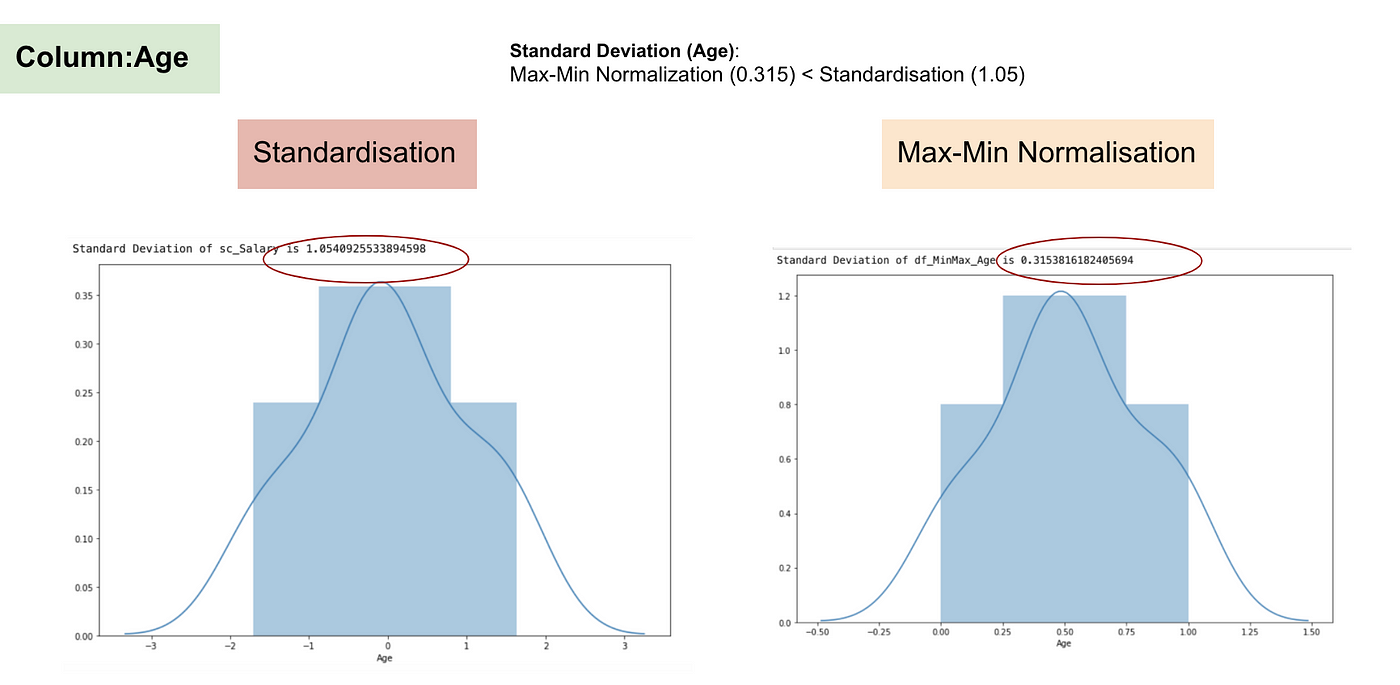

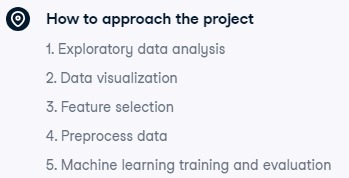

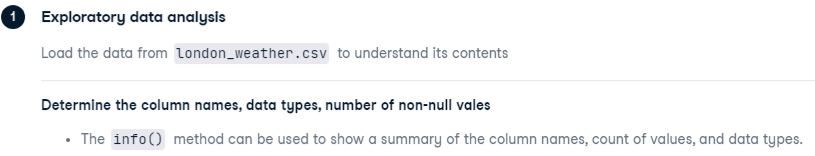

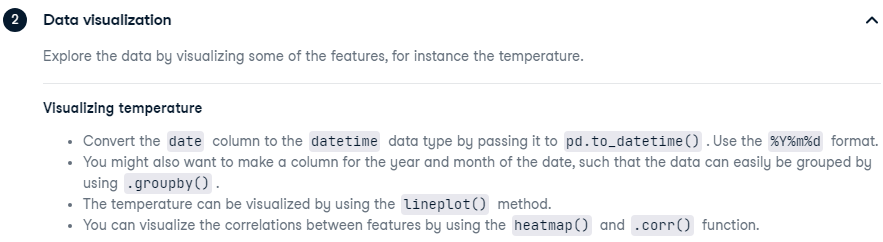

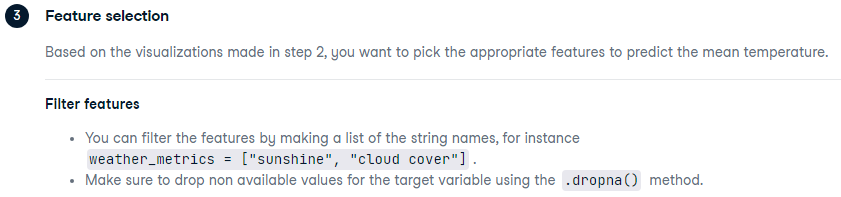

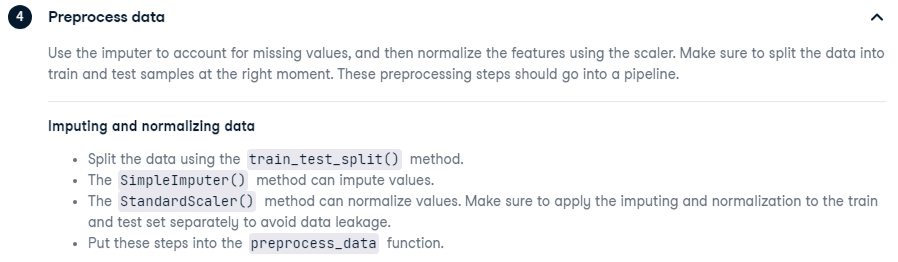

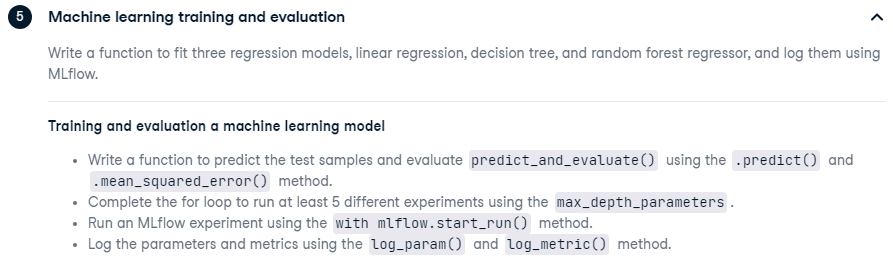